<a href="https://colab.research.google.com/github/codiak/DTSA-5511/blob/main/DTSA_5511_Kaggle_PCam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Set up and import the "Histopathologic Cancer Detection" data from Kaggle, and include initial Exploratory Data Analysis.

# Import necessary libraries
!pip install kaggle
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open histopathologic-cancer-detection.zip, histopathologic-cancer-detection.zip.zip or histopathologic-cancer-detection.zip.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: 'train_labels.csv'

## Fetch Data

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c histopathologic-cancer-detection

100% 6.29G/6.31G [01:15<00:00, 184MB/s]
100% 6.31G/6.31G [01:15<00:00, 89.4MB/s]


In [9]:
!unzip histopathologic-cancer-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

FileNotFoundError: [Errno 2] No such file or directory: 'test_labels.csv'

In [10]:
# Load train labels
train_df = pd.read_csv("train_labels.csv")

In [12]:
# Load sample
sample_df = pd.read_csv("sample_submission.csv")

# Exploratory Data Analysis


In [13]:
# Take a peek!
print(train_df.head())
# print(test_df.head())

print(train_df.describe())
# print(test_df.describe())

                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0
               label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [19]:
train_df.sample(n=3)

,id,label
175533,1092c4c128c128a69bfd02eb263c1039aa1d5695,0
79081,5403e4e21a96d22e69ce130a1ef19ea1df97a4ff,1
166831,a61d3a79e1c1de24b91df4c8055a2dc52f9f1428,1


train/cd94caf02b741747a1edc0380001791c1f1861ff.tif
train/6b16cb467b7d5a61c10c27fd1824185b2d36eee8.tif
train/0304f2686aa8796043448ab541616471c65a79b3.tif
train/6a7316aed35409f51f2559e3607906c5c3412ed6.tif


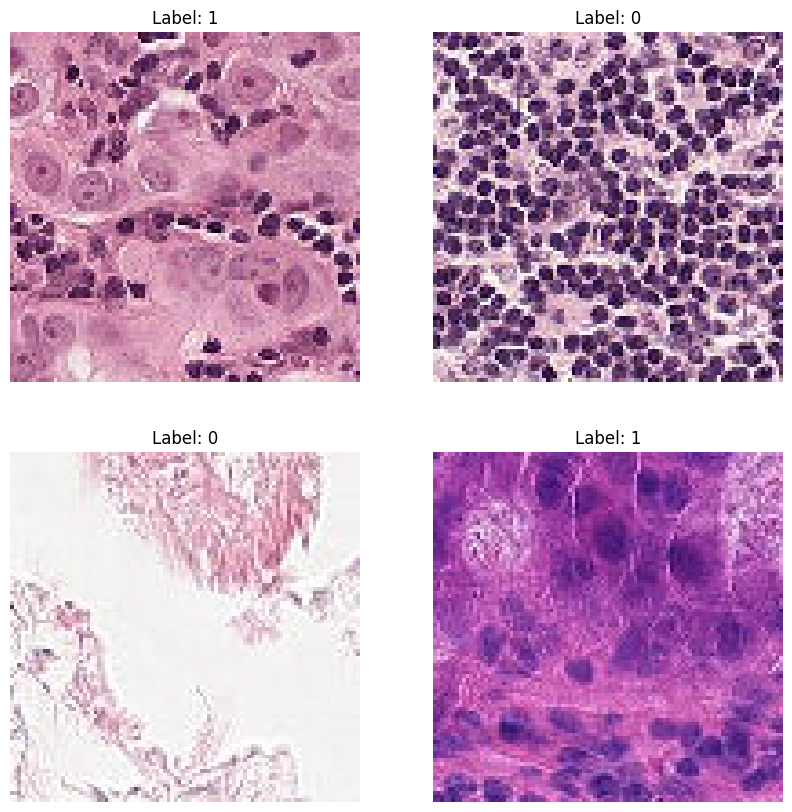

In [27]:
# prompt: Show a sample of images from the "histopathologic-cancer-detection" dataset loaded above.

import matplotlib.pyplot as plt
from skimage.io import imread

# Get a sample of images
images = train_df.sample(n=4)

# Plot the images
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i in range(4):
    ax = axes[i // 2, i % 2]
    image_file = f"train/{images['id'].values[i]}.tif"
    print(image_file)
    image = imread(image_file)
    ax.imshow(image, cmap="gray")
    ax.set_title(f"Label: {images['label'].values[i]}")
    ax.axis("off")

plt.show()


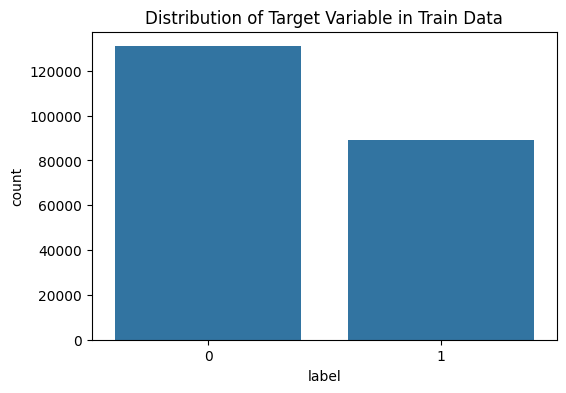

In [32]:
# Visualize the data
import seaborn as sns

# Distribution of target variable in train data
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Target Variable in Train Data')
plt.show()